In [1]:
import pickle

feature_bow = pickle.load(open("model/feature-bow.p", "rb"))
model_nb = pickle.load(open("model/model-nb.p", "rb"))
model_nn = pickle.load(open("model/model-nn.p", "rb"))

e:\AppWeb\be better\envy\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 0.22.2.post1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
e:\AppWeb\be better\envy\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 0.22.2.post1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
e:\AppWeb\be better\envy\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 0.22.2.post1 when using version 1.7.2. This m

In [2]:
import pandas as pd

data = pd.read_csv("data/clean_hanan.csv")

In [3]:
def predict_sentiment(sent):
    #feature extraction
    text_feature = feature_bow.transform([sent])
    #predict
    return model_nb.predict(text_feature)[0]

In [4]:
data['sentiment'] = data.full_text.apply(predict_sentiment)
data

,full_text,sentiment
0,ada yg sepemikiran ternyata kalo bahlil mirip...,negative
1,bener perihh lidahkuu jirr apaa ak di adzab ka...,positive
2,orangorang kagak jelas kaya budie arie bahlil ...,negative
3,gus bahlil alpapuani,neutral
4,kalau bahlil ini masuk golongan udah jelek to...,neutral
...,...,...
1007,fotonya gak enak diliat kek bahlil,negative
1008,baik hati sekali gus bahlil ini,negative
1009,bahlil belum tentu orang ganteng itu cerdas ya...,negative
1010,bahlil mah enak ga pusing kostum helloween _,negative


In [5]:
data.to_csv("data/predicted_hanan.csv", index=False)

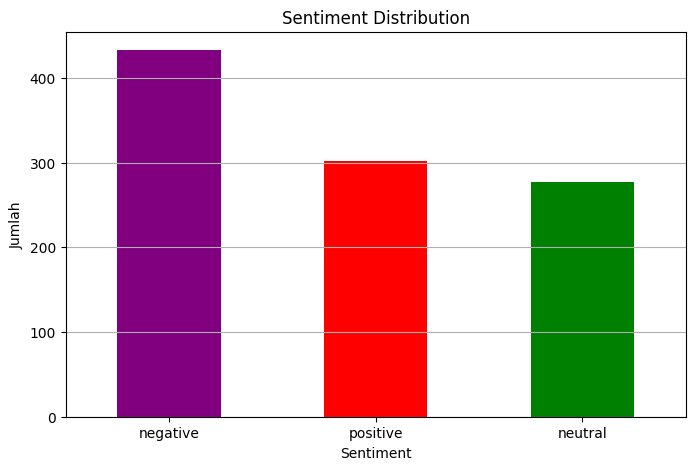

sentiment
negative    433
positive    302
neutral     277
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt

sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['purple', 'red', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print(sentiment_counts)

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter 

In [8]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('indonesian'))

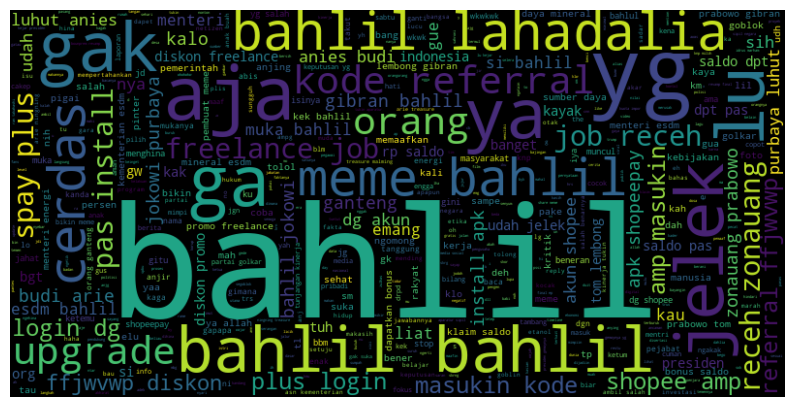

In [9]:
# word cloud
# Gabungkan semua teks berdasarkan sentimen
data_text = ' '.join(data['full_text'].astype(str).tolist())

# Generate word cloud
wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400).generate(data_text)

# Tampilkan word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

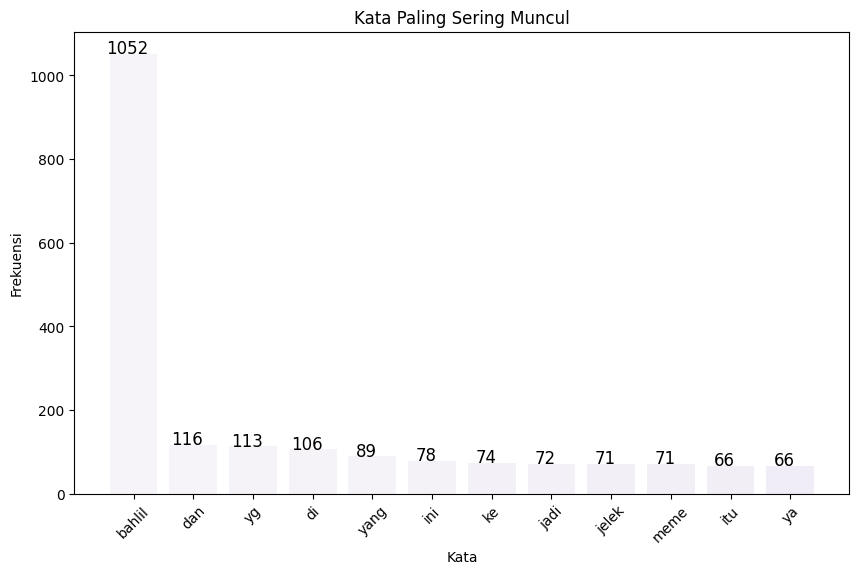

In [10]:
# Bar Chart Kata Paling Sering Muncul
# Gabung semua teks dari kolom 'full_text'
text = ' '.join(data['full_text'].astype(str).tolist())
words = text.split()

# Hitung frekuensi kata
word_counts = Counter(words)

# Ambil 12 kata paling umum
top_words = word_counts.most_common(12)

words, counts = zip(*top_words)

# Make Bar Chart matlpotlib
colors = plt.cm.PuRd(range(len(words)))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(words, counts, color=colors)

ax.set_xlabel('Kata')
ax.set_ylabel('Frekuensi')
ax.set_title('Kata Paling Sering Muncul')
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation=45)

# Tambahan Label Frekuensi di atas bar
for bar, num in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

# Tampilkan Bar Chart
plt.show()